In [11]:
# 📓 Synthetic ECG Classification - Healthy vs Unhealthy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# === Step 1: Load Synthetic ECG Data ===
data = pd.read_csv("synthetic_ecg_data.csv")
print("✅ Data loaded successfully")
print("Shape:", data.shape)
print(data["Label"].value_counts())

✅ Data loaded successfully
Shape: (1000, 101)
Label
Healthy      500
Unhealthy    500
Name: count, dtype: int64


In [15]:
# === Step 2: Split Features and Labels ===
X = data.drop("Label", axis=1)
y = data["Label"]

In [17]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# === Step 4: Train Classifier ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


=== Classification Report ===
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00        97
   Unhealthy       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


=== Confusion Matrix ===


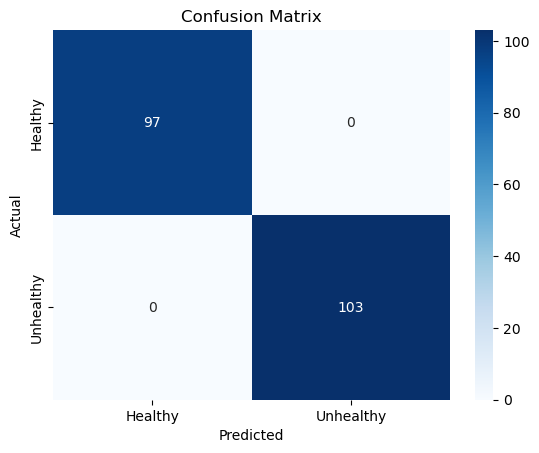

In [21]:
# === Step 5: Evaluation ===
y_pred = clf.predict(X_test)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# === Step 6: Save the Model ===
import joblib
joblib.dump(clf, "synthetic_ecg_model.pkl")
print("✅ Model saved to synthetic_ecg_model.pkl")

✅ Model saved to synthetic_ecg_model.pkl
